# <span style='color:#008080'> Prosper Loan Data  </span>

## <span style='color:#008080'>by Mahmoud Sallam  </span>


## <span style='color:#008080'> Brief Intro About Prosper  </span>



#### - Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States.

#### - Prosper has facilitated more than $18 billion in loans to more than 1,100,000 people.

#### - Through Prosper, people can invest in each other in a way that is financially and socially rewarding.

#### - Borrowers apply online for a fixed-rate, fixed-term loan between $2,000 and $40,000.

#### - Individuals and institutions can invest in the loans and earn attractive returns.  

#### - Prosper handles all loan servicing on behalf of the matched borrowers and investors.

## <span style='color:#008080'> We Want To Know  </span>


#### - who are the borrowers.

#### - the characteristics of the borrowers.

#### - the purposes that make borrowers take loans.

#### - the variables that affect on the borrower APR.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#Load in your dataset
df = pd.read_csv('prosperLoanData.csv')

#display all the columns
pd.set_option('display.max_columns', None)  

#display first 5 rows
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

limit_output extension: Maximum message size of 10000 exceeded with 12258 characters

In [3]:
#summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#summary of columns count and its dtypes
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Columns: 81 entries, ListingKey to Investors
dtypes: bool(3), float64(50), int64(11), object(17)
memory usage: 68.1+ MB


### What is the structure of your dataset?

> Your answer here!     

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

the borrower’s APR and the loan amount

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

Term(The length of the loan expressed in months),
MonthlyLoanPayment,ProsperRating, ListingCategory, BorrowerStat,
EmploymentStatus, IsBorrowerHomeowner, DebtToIncomeRatio, StatedMonthlyIncome

In [5]:
#the dataframe with only the features of interest
df = df[['MemberKey','LoanOriginationDate','LoanOriginalAmount','Term','MonthlyLoanPayment',
    'BorrowerAPR','ProsperScore','ListingCategory (numeric)','BorrowerState',
    'EmploymentStatus','IsBorrowerHomeowner','DebtToIncomeRatio','StatedMonthlyIncome']]

df.head()

,MemberKey,LoanOriginationDate,LoanOriginalAmount,Term,MonthlyLoanPayment,BorrowerAPR,ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome
0,1F3E3376408759268057EDA,2007-09-12 00:00:00,9425,36,330.43,0.16516,NaN,0,CO,Self-employed,True,0.17,3083.333333
1,1D13370546739025387B2F4,2014-03-03 00:00:00,10000,36,318.93,0.12016,7.0,2,CO,Employed,False,0.18,6125.000000
2,5F7033715035555618FA612,2007-01-17 00:00:00,3001,36,123.32,0.28269,NaN,0,GA,Not available,False,0.06,2083.333333
3,9ADE356069835475068C6D2,2012-11-01 00:00:00,10000,36,321.45,0.12528,9.0,16,GA,Employed,True,0.15,2875.000000
4,36CE356043264555721F06C,2013-09-20 00:00:00,15000,36,563.97,0.24614,4.0,2,MN,Employed,True,0.26,9583.333333


In [6]:
#change the type of LoanOriginationDate to datetime
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'], format='%Y-%m-%d')

In [7]:
#replace the numbers in ListingCategory to the name of every category
df['ListingCategory (numeric)'].replace({0: 'Not Available', 1 : 'Debt Consolidation',2 : 'Home Improvement',
                                         3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7: 'Other',
                                         8 : 'Baby&Adoption', 9: 'Boat', 10 : "Cosmetic Procedure",11 : 'Engagement Ring',
                                         12 : 'Green Loans',13 : 'Household Expenses', 14 : 'Large Purchases',
                                         15 : 'Medical/Dental', 16 : 'Motorcycle',17 : 'RV', 18 : 'Taxes',
                                         19 : "Vacation",20 : 'Wedding Loans'}, inplace=True)

In [8]:
#change some columns names
df = df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'})
df.head()

,MemberKey,LoanOriginationDate,LoanOriginalAmount,Term,MonthlyLoanPayment,BorrowerAPR,ProsperScore,ListingCategory,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome
0,1F3E3376408759268057EDA,2007-09-12,9425,36,330.43,0.16516,NaN,Not Available,CO,Self-employed,True,0.17,3083.333333
1,1D13370546739025387B2F4,2014-03-03,10000,36,318.93,0.12016,7.0,Home Improvement,CO,Employed,False,0.18,6125.000000
2,5F7033715035555618FA612,2007-01-17,3001,36,123.32,0.28269,NaN,Not Available,GA,Not available,False,0.06,2083.333333
3,9ADE356069835475068C6D2,2012-11-01,10000,36,321.45,0.12528,9.0,Motorcycle,GA,Employed,True,0.15,2875.000000
4,36CE356043264555721F06C,2013-09-20,15000,36,563.97,0.24614,4.0,Home Improvement,MN,Employed,True,0.26,9583.333333


In [9]:
#removing the duplicated rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MemberKey            113937 non-null  object        
 1   LoanOriginationDate  113937 non-null  datetime64[ns]
 2   LoanOriginalAmount   113937 non-null  int64         
 3   Term                 113937 non-null  int64         
 4   MonthlyLoanPayment   113937 non-null  float64       
 5   BorrowerAPR          113912 non-null  float64       
 6   ProsperScore         84853 non-null   float64       
 7   ListingCategory      113937 non-null  object        
 8   BorrowerState        108422 non-null  object        
 9   EmploymentStatus     111682 non-null  object        
 10  IsBorrowerHomeowner  113937 non-null  bool          
 11  DebtToIncomeRatio    105383 non-null  float64       
 12  StatedMonthlyIncome  113937 non-null  float64       
dtypes: bool(1), da

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MemberKey            77557 non-null  object        
 1   LoanOriginationDate  77557 non-null  datetime64[ns]
 2   LoanOriginalAmount   77557 non-null  int64         
 3   Term                 77557 non-null  int64         
 4   MonthlyLoanPayment   77557 non-null  float64       
 5   BorrowerAPR          77557 non-null  float64       
 6   ProsperScore         77557 non-null  float64       
 7   ListingCategory      77557 non-null  object        
 8   BorrowerState        77557 non-null  object        
 9   EmploymentStatus     77557 non-null  object        
 10  IsBorrowerHomeowner  77557 non-null  bool          
 11  DebtToIncomeRatio    77557 non-null  float64       
 12  StatedMonthlyIncome  77557 non-null  float64       
dtypes: bool(1), datetime64[ns](1),

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MemberKey            77557 non-null  object        
 1   LoanOriginationDate  77557 non-null  datetime64[ns]
 2   LoanOriginalAmount   77557 non-null  int64         
 3   Term                 77557 non-null  int64         
 4   MonthlyLoanPayment   77557 non-null  float64       
 5   BorrowerAPR          77557 non-null  float64       
 6   ProsperScore         77557 non-null  float64       
 7   ListingCategory      77557 non-null  object        
 8   BorrowerState        77557 non-null  object        
 9   EmploymentStatus     77557 non-null  object        
 10  IsBorrowerHomeowner  77557 non-null  bool          
 11  DebtToIncomeRatio    77557 non-null  float64       
 12  StatedMonthlyIncome  77557 non-null  float64       
dtypes: bool(1), datetime64[ns](1),

In [12]:
df.isna().sum()

MemberKey              0
LoanOriginationDate    0
LoanOriginalAmount     0
Term                   0
MonthlyLoanPayment     0
BorrowerAPR            0
ProsperScore           0
ListingCategory        0
BorrowerState          0
EmploymentStatus       0
IsBorrowerHomeowner    0
DebtToIncomeRatio      0
StatedMonthlyIncome    0
dtype: int64

In [13]:
df['LoanOriginationDate'].min(),df['LoanOriginationDate'].max()

(Timestamp('2009-07-20 00:00:00'), Timestamp('2014-03-12 00:00:00'))

In [14]:
df['EmploymentStatus'].value_counts()

Employed         65884
Full-time         7585
Other             3526
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

In [15]:
df = df[df['EmploymentStatus'] == 'Employed']

> I droped all the EmploymentStatus except Employed becaues there is a huge difference in the value counts and however full-time and self-employes status are somehow considered as employed but I think maybe they have different properities that they didnt compine them all in one status  
I wanted my dataset to be consistant to be able to get insights from it


In [16]:
df = df.drop(['EmploymentStatus'], axis=1);

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [17]:
#define a function to avoid repeating the code
def bar_count(df,xvar):
    base_color = sb.color_palette()[0]
    sb.countplot(data=df, x=xvar, color=base_color);
    
    plt.title(f'count of {xvar}', fontsize=14, weight = "bold");
    plt.xlabel(xvar.title(), fontsize=10, weight = "bold");
    plt.ylabel('count', fontsize=10, weight = "bold"); 

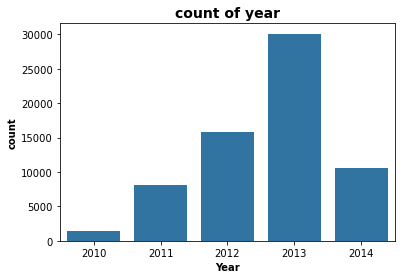

In [18]:
df['year'] = df["LoanOriginationDate"].dt.year
bar_count(df,'year') 

>the is an increase in the number of the loans in 2013

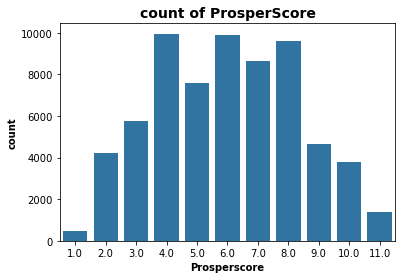

In [19]:
bar_count(df,'ProsperScore') 

> the graph of the prosper score of risk to the loans after 2009 with 1 being the highest risk

In [20]:
def labeles_and_title(X_label,Y_Label,title):
    
    plt.title(title,fontsize = 14, weight = "bold")
    plt.xlabel(X_label,fontsize = 10, weight = "bold")
    plt.ylabel(Y_Label,fontsize = 10, weight = "bold")

# Visualization 1

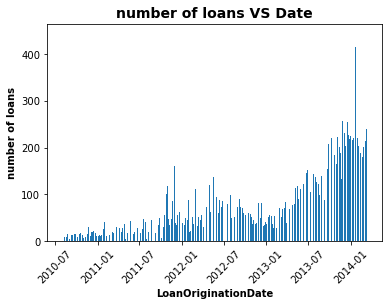

In [21]:
counts = df['LoanOriginationDate'].value_counts(sort=False)
plt.bar(counts.index,counts);

plt.xticks(rotation=45);
labeles_and_title('LoanOriginationDate','number of loans','number of loans VS Date')

> the huge  increase of the loans nuber was in the beginning of 2014

# Visualization 2

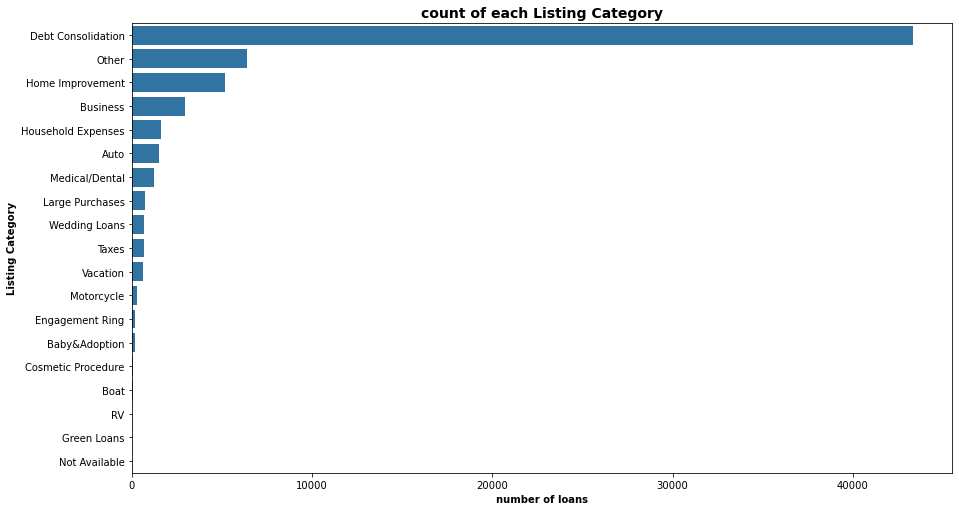

In [22]:
plt.figure(figsize=(14.70, 8.27))
base_color = sb.color_palette()[0]

order = df['ListingCategory'].value_counts()
sb.countplot(data=df, y='ListingCategory', color=base_color, order=order.index);

#plt.xscale('log')
labeles_and_title('number of loans','Listing Category','count of each Listing Category')

> the debt consolidation takes the biggest number of loans   
there is increase in taking out a new loan to pay off other liabilities and consumer debts.  
many peaple couldnt pay their loans so they take another one

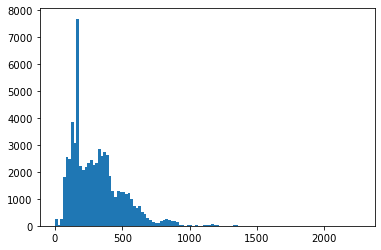

In [23]:
bins = np.arange(0, df['MonthlyLoanPayment'].max()+20, 20)

plt.hist(data=df, x='MonthlyLoanPayment', color=base_color, bins=bins);

> most of the Monthly Loan Payment are between 0 and 500

# Visualization 3

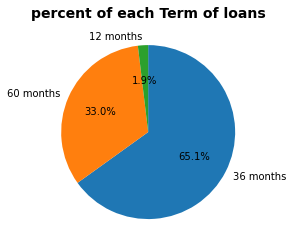

In [24]:
order = df['Term'].value_counts()
labels = ['36 months','60 months','12 months']

plt.pie(order, labels = labels, startangle = 90, counterclock = False, autopct='%1.1f%%');

plt.title('percent of each Term of loans',fontsize = 14, weight = "bold");

> 65.1% of the loans is for 36 month  
33% of the loans is for 60 month  
1.9% of the loans is for 12 month

# Visualization 4

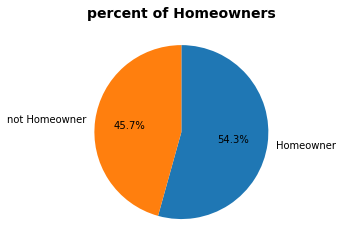

In [25]:
order = df['IsBorrowerHomeowner'].value_counts()
labels = ['Homeowner','not Homeowner']

plt.pie(order, labels = labels, startangle = 90, counterclock = False, autopct='%1.1f%%');

plt.title('percent of Homeowners',fontsize = 14, weight = "bold");

> 54.3% of the Borrowers is Homeowner  
> 45.7% of the Borrowers is not Homeowner  

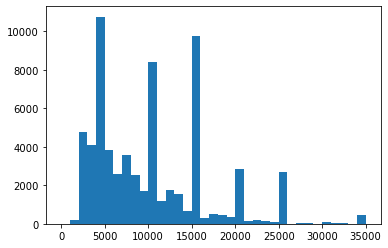

In [26]:
bins = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)

plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins);

> the histogram is skewed to the right with increase loans near to 5000, 10000, 15000, 20000 and 25000

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

>done

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the histogram of LoanOriginalAmount is skewed to the right with increase loans near to 5000, 10000, 15000, 20000 and 25000

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the counts of loans for debt consolidation

> i changed the number of the ListingCategory column to the name of each Category  
changed the LoanOriginationDate column to datetime type

>to explore the data easily 


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

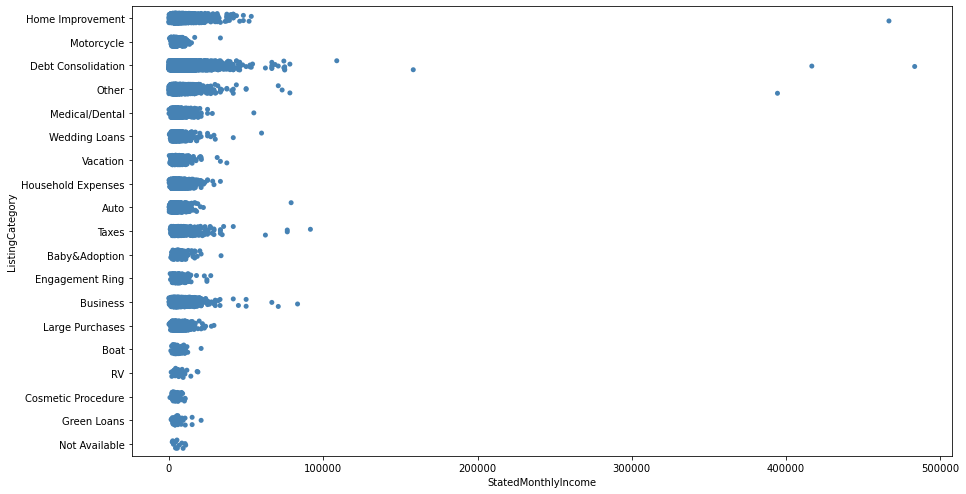

In [27]:
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data=df, y='ListingCategory', x='StatedMonthlyIncome',
             jitter=0.2,color ='steelblue',orient='h' );

> there are some outliers in the Stated Monthly Income,  
maybe they intered the anual salary as a Monthly Income

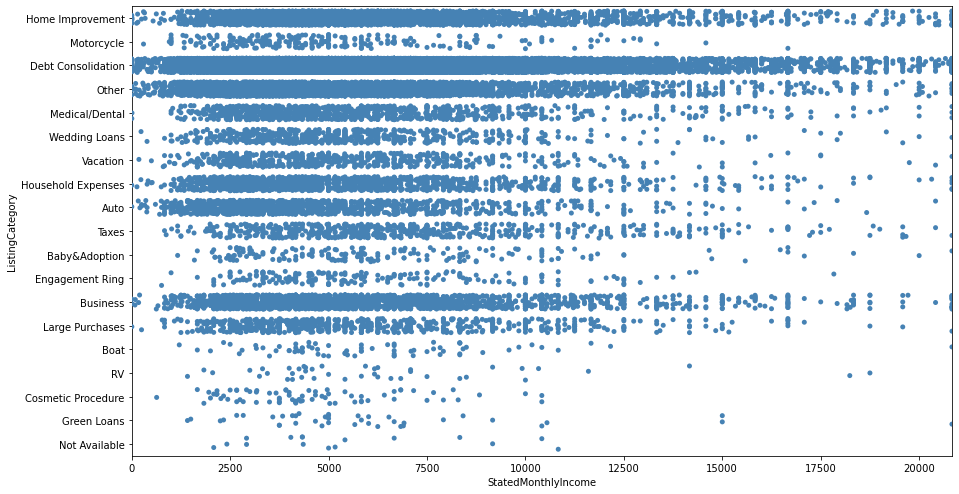

In [28]:
#set plot dimensions
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data=df, y='ListingCategory', x='StatedMonthlyIncome',
             jitter=0.3,color ='steelblue',orient='h' );
plt.xlim(0,df['StatedMonthlyIncome'].quantile(0.99));

In [29]:
#remove the outliers of Stated Monthly Income
df = df[df['StatedMonthlyIncome']<=df['StatedMonthlyIncome'].quantile(0.99)]

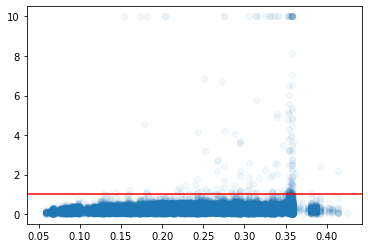

In [30]:
# Scatter plot
plt.scatter(data = df, y = 'DebtToIncomeRatio', x = 'BorrowerAPR', alpha = .05);
#plt.ylim(0, 1)
plt.axhline(1, color='r');

>there are many outliers in the DebtToIncomeRatio as it should be between 0 and 1  
maybe the forgot to put the decimal point

In [31]:
#remove the outliers of DebtToIncomeRatio
df = df[df['DebtToIncomeRatio']<1]

# Visualization 5

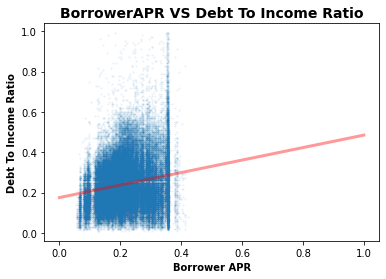

In [32]:
import statsmodels.api as sm
fig, ax = plt.subplots()

axis_min= 0
axis_max= 1
# regress BorrowerAPR on DebtToIncomeRatio
X = df['BorrowerAPR']
Y = df['DebtToIncomeRatio']
results = sm.OLS(Y, sm.add_constant(X)).fit()

# calculate estimated y values for regression line
X_line = X.copy()
X_line.loc[axis_min] = axis_min
X_line.loc[axis_max] = axis_max
Y_est = X_line * results.params[1] + results.params[0]

# draw points, regression line, and line of 1:1 linear relationship
ax.plot(X_line, Y_est,c='r', alpha=0.4, linewidth=3);
ax.scatter(X, Y, alpha=0.05, s=2);

labeles_and_title('Borrower APR','Debt To Income Ratio','BorrowerAPR VS Debt To Income Ratio')

> there is a positive correlation between BorrowerAPR and DebtToIncomeRatio

In [33]:
df['BorrowerAPR'].corr(df['DebtToIncomeRatio'])


0.18919999501183518

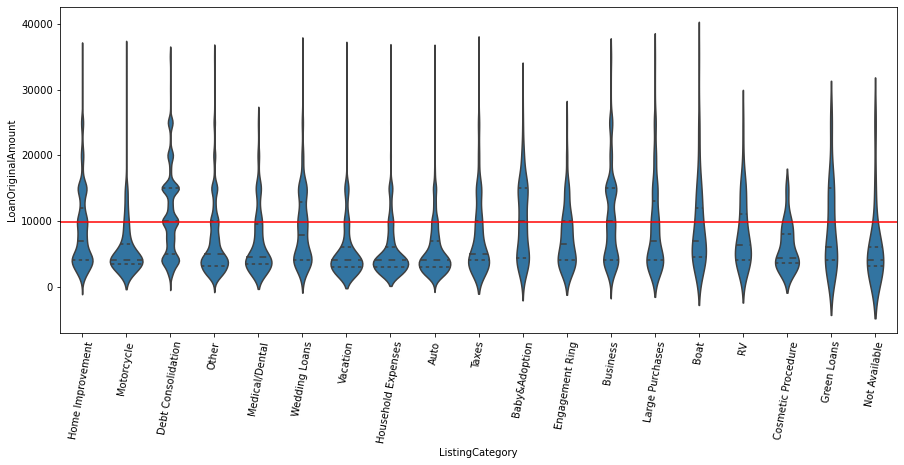

In [34]:
plt.figure(figsize=(15, 6))
sb.violinplot(data = df, x = 'ListingCategory', y = 'LoanOriginalAmount',color=base_color, inner='quartile');
plt.xticks(rotation=80);
plt.axhline(df['LoanOriginalAmount'].mean(), color='r');

> all the LoanOriginalAmount for each category are skwed to the right as the median is less the the mean of LoanOriginalAmount

# Visualization 6

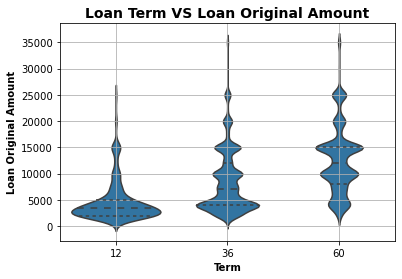

In [35]:
sb.violinplot(x = 'Term', y = 'LoanOriginalAmount', data=df,color=base_color, inner='quartile');

plt.grid()
labeles_and_title('Term','Loan Original Amount','Loan Term VS Loan Original Amount')

> about 75% of the loans for 12 months are for Amount less than 5000    
> about 75% of the loans for 36 months are for Amount less than 10000   
> about 75% of the loans for 60 months are for Amount less than 15000 with a peak at 15000 as they need more time to pay it back

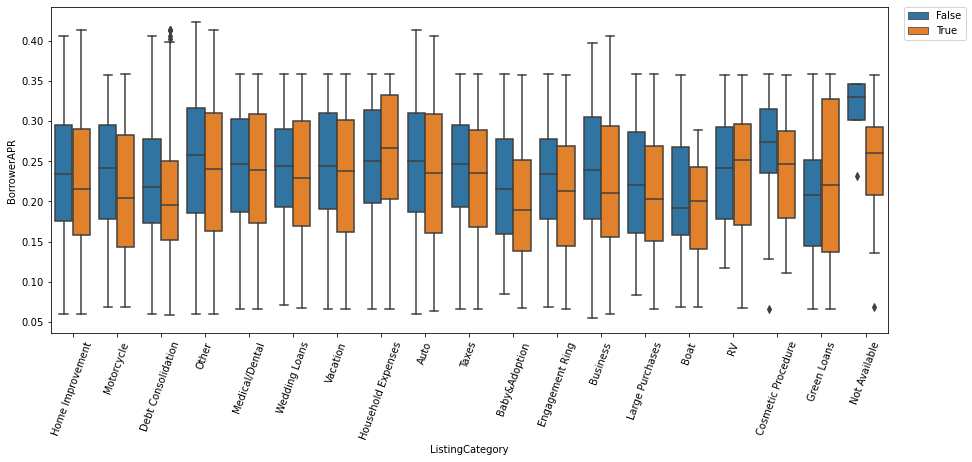

In [36]:
plt.figure(figsize=(15, 6))
sb.boxplot(data = df, x = 'ListingCategory', y = 'BorrowerAPR', hue="IsBorrowerHomeowner");
plt.xticks(rotation=70);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

>the median of BorrowerAPR for home owners is less then the median of BorrowerAPR for not home owners for all ListingCategory.    except for household expenses and green loans

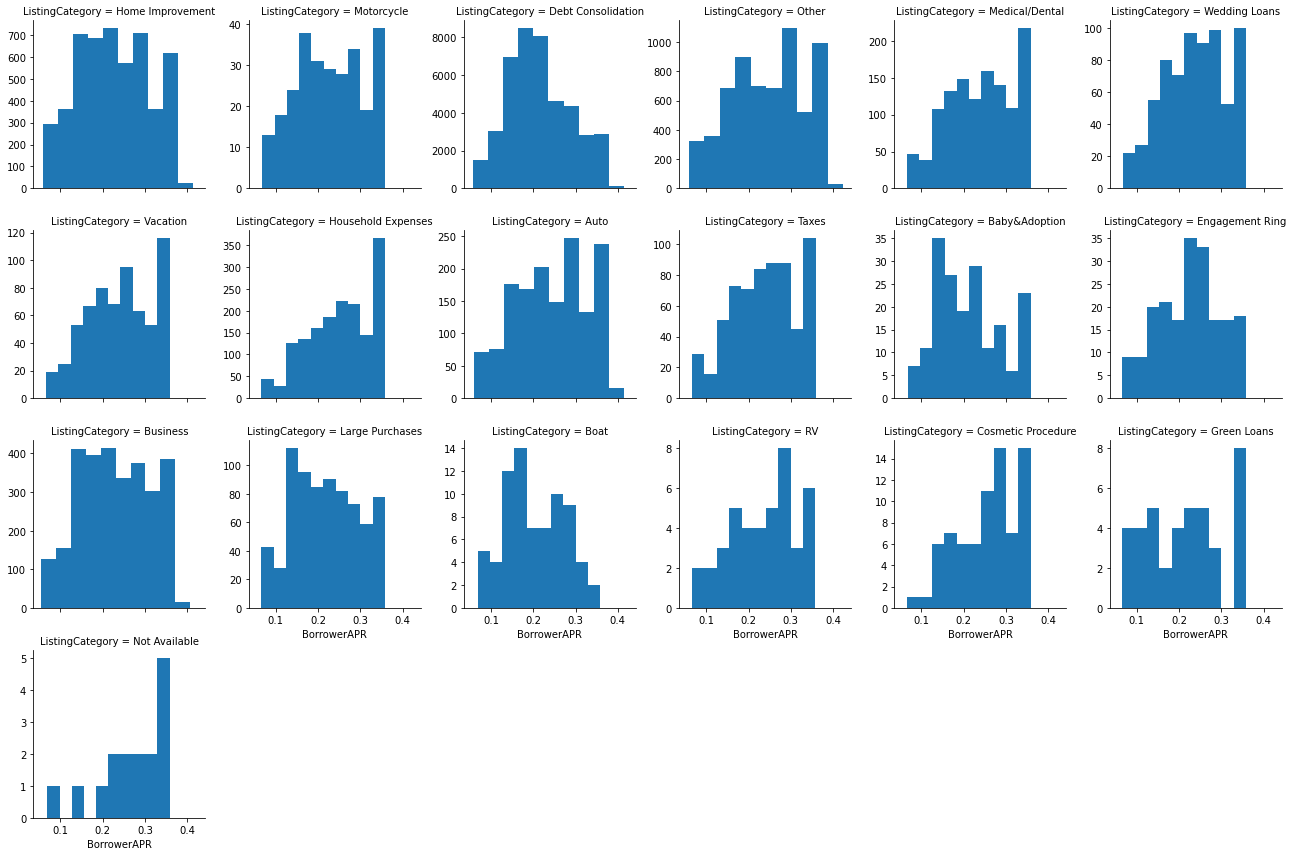

In [37]:
g = sb.FacetGrid(df, col="ListingCategory", col_wrap=6, sharey=False);
g.map(plt.hist, 'BorrowerAPR');

> cant tell the distribution 

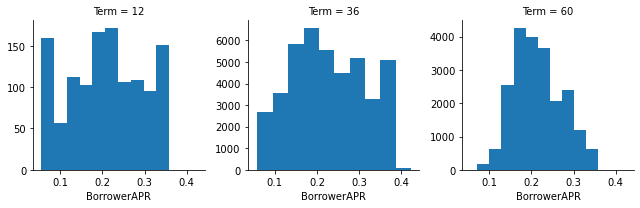

In [38]:
g = sb.FacetGrid(df, col="Term", col_wrap=3, sharey=False);
g.map(plt.hist, 'BorrowerAPR');

> the distribution of BorrowerAPR for 60 months loans is kind of normal as there is a huge number of employed, we can notice that from the y axis

# Visualization 7

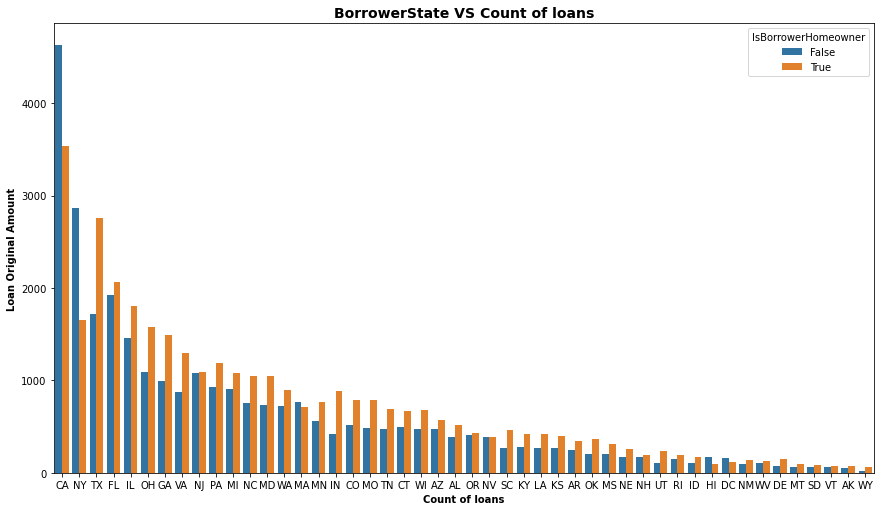

In [39]:
plt.figure(figsize=[14.70, 8.27])
sb.color_palette('Set2')

order = df['BorrowerState'].value_counts()
ax = sb.countplot(data=df, x='BorrowerState', order=order.index, hue="IsBorrowerHomeowner");

labeles_and_title('Count of loans','Loan Original Amount','BorrowerState VS Count of loans')

> california has the biggest number of prosper loans then newyork then texas

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> there is a positive correlation between BorrowerAPR and DebtToIncomeRatio

>there are some outliers in the Stated Monthly Income maybe they intered the anual salary as a Monthly Income
there are many outliers in the DebtToIncomeRatio as it should be between 0 and 1 maybe the forgot to put the decimal point

>about 75% of the loans for 12 months are for Amount less than 5000  
about 75% of the loans for 36 months are for Amount less than 10000  
about 75% of the loans for 60 months are for Amount less than 15000 with a peak at 15000 as they need more time to pay it back
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


>the median of BorrowerAPR for home owners is less then the median of BorrowerAPR for not home owners for all ListingCategory. except for household expenses and green loans

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

# Visualization 8

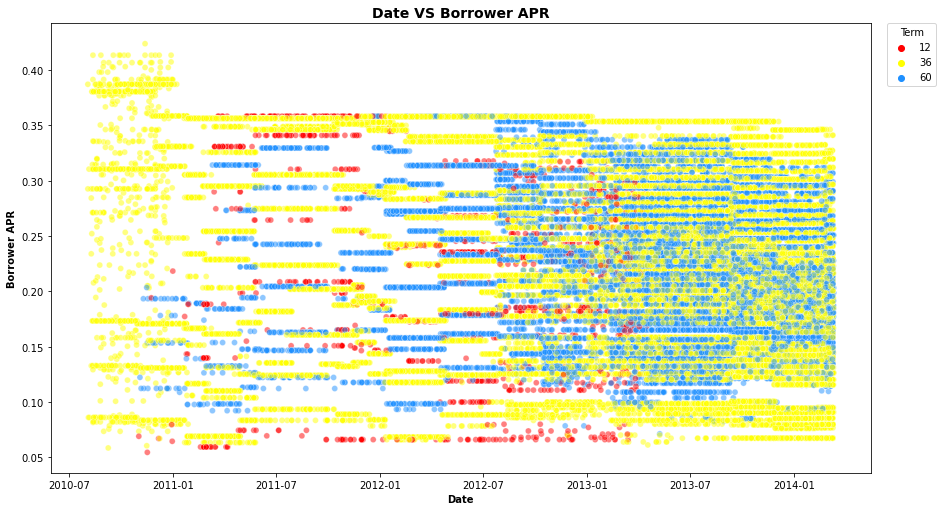

In [40]:
plt.figure(figsize=[14.70, 8.27])

sb.scatterplot(data=df, x='LoanOriginationDate', y='BorrowerAPR', hue='Term',
               palette=['red','yellow','dodgerblue'], marker="o",alpha=.5);

plt.legend(title='Term',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
labeles_and_title('Date','Borrower APR','Date VS Borrower APR')

> most of the 12 months loans is between 2011 and 2013  
there is an increase of the 60 months loans and 36 months loans from 2012   
there is a group of 12 months loans with BorrowerAPR more than 0.35 between 2010-07 till 2011-01 between 2011-07 till 2012-07 there are some lines of BorrowerAPR maybe there was a fixed values for BorrowerAPR and except that group BorrowerAPR is less than 0.35

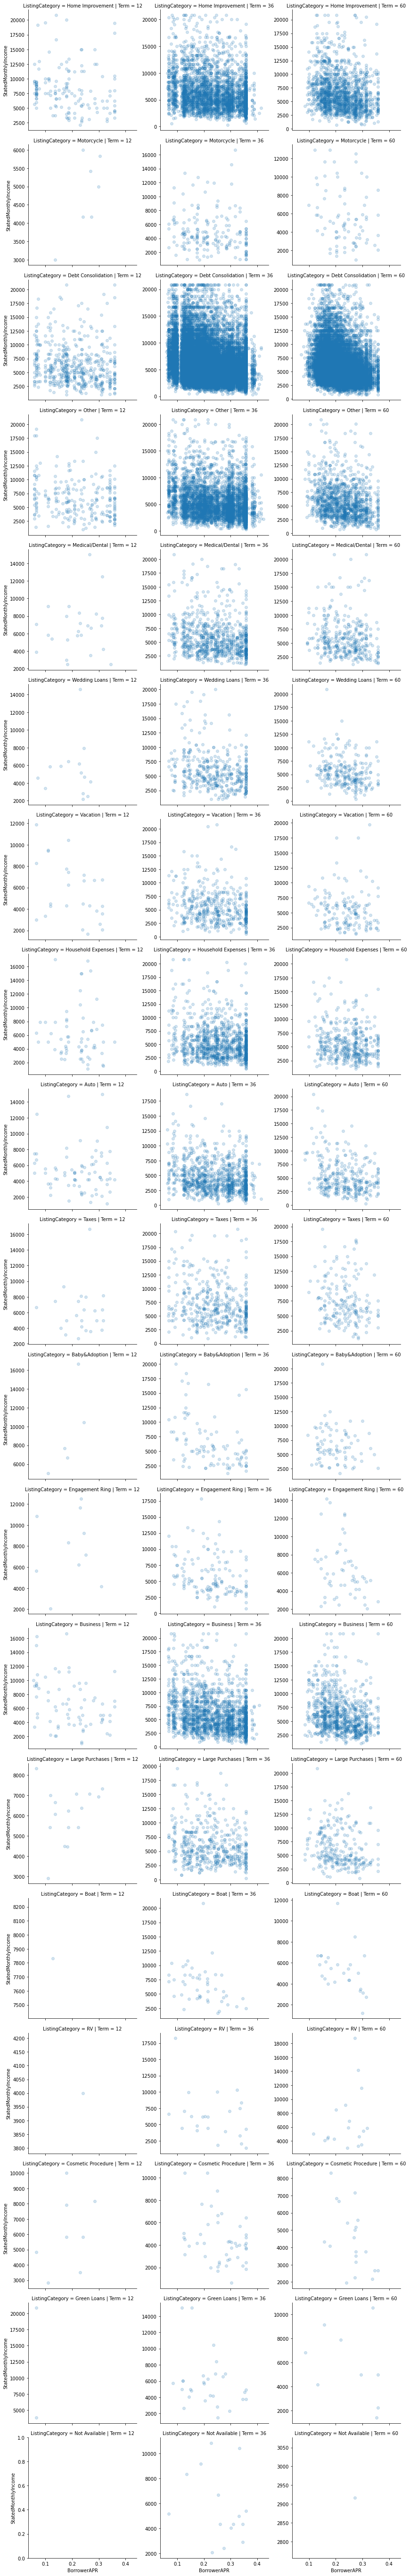

In [41]:
g = sb.FacetGrid(data = df, col = 'Term', row = 'ListingCategory', height = 4, sharey=False);
g.map(plt.scatter, 'BorrowerAPR', 'StatedMonthlyIncome',alpha=.2);

>most of the listing categories have 36 months loans more than 60 months loans then 12 months loans is the least  
as we saw before there is increase in the debt consolidation, home improvement and business

# Visualization 9

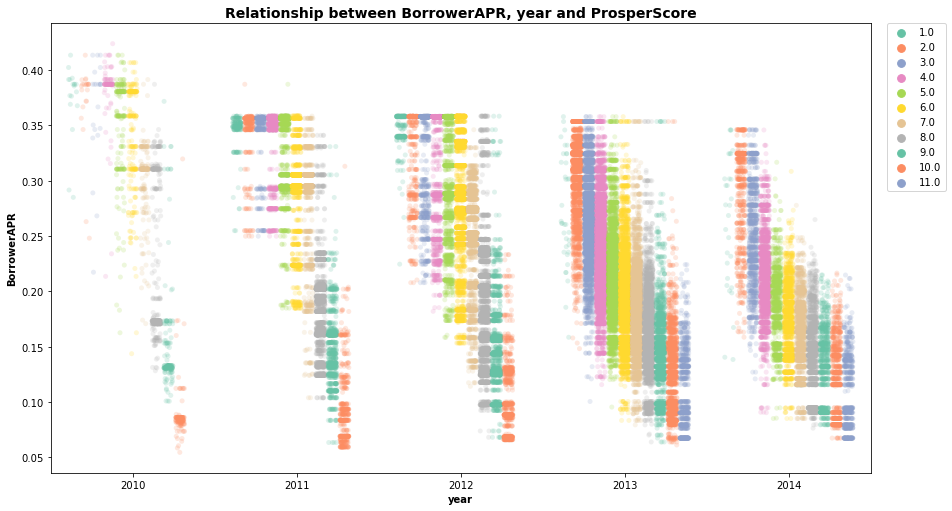

In [42]:
plt.figure(figsize=[14.70, 8.27])

sb.stripplot(data=df, y='BorrowerAPR', x='year', hue='ProsperScore', jitter=0.3, palette='Set2', dodge=True, alpha=.2 );

#set the legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

#set the title and the labels
labeles_and_title('year','BorrowerAPR','Relationship between BorrowerAPR, year and ProsperScore')

> we can see the increase of the number of loans in 2013 from the density of the points  
the loans with prosper score of risk are too slight but they appear more in 2011 and 2012  
even though the prosper score of risk of 2 is the second highest risk, it apears more in 2013

>we see again the same group of 12 months loans with BorrowerAPR more than 0.35 between 2010-07 till 2011-01 between 2011-07 till 2012-07

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here! 
most of the 12 months loans is between 2011 and 2013
there is an increase of the 60 months loans and 36 months loans from 2012  
most of the listing categories have 36 months loans more than 60 months loans then 12 months loans is the least
as we saw before there is increase in the debt consolidation, home improvement and business

### Were there any interesting or surprising interactions between features?

> Your answer here!
there is a group of 12 months loans with BorrowerAPR more than 0.35 between 2010-07 till 2011-01 between 2011-07 till 2012-07 there are some lines of BorrowerAPR maybe there was a fixed values for BorrowerAPR and except that group BorrowerAPR is less than 0.35